In [ ]:
!pip install tensorflow


!pip install scikit-learn
!pip install seaborn


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
train_dir = 'G:/download/Archive/train'
test_dir = 'G:/download/Archive/test'
val_dir = 'G:/download/Archive/val'

batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=batch_size, class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=batch_size, class_mode='binary')
val_generator = test_datagen.flow_from_directory(val_dir, target_size=(224, 224), batch_size=batch_size, class_mode='binary')


In [ ]:

# Build the CNN Model

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:

# Compile the Model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:

# Train the Model

epochs = 5

history = model.fit(train_generator, epochs=epochs, validation_data=val_generator)

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc}')

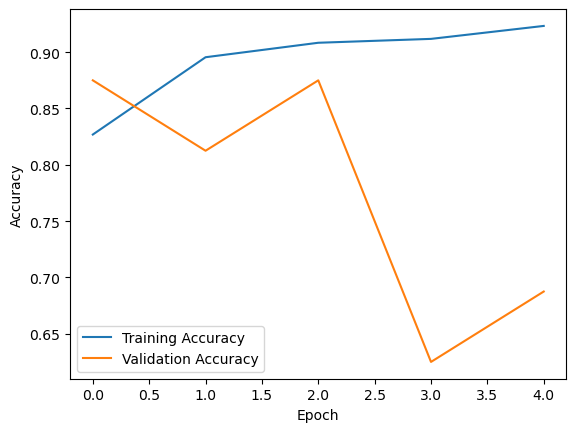

In [161]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

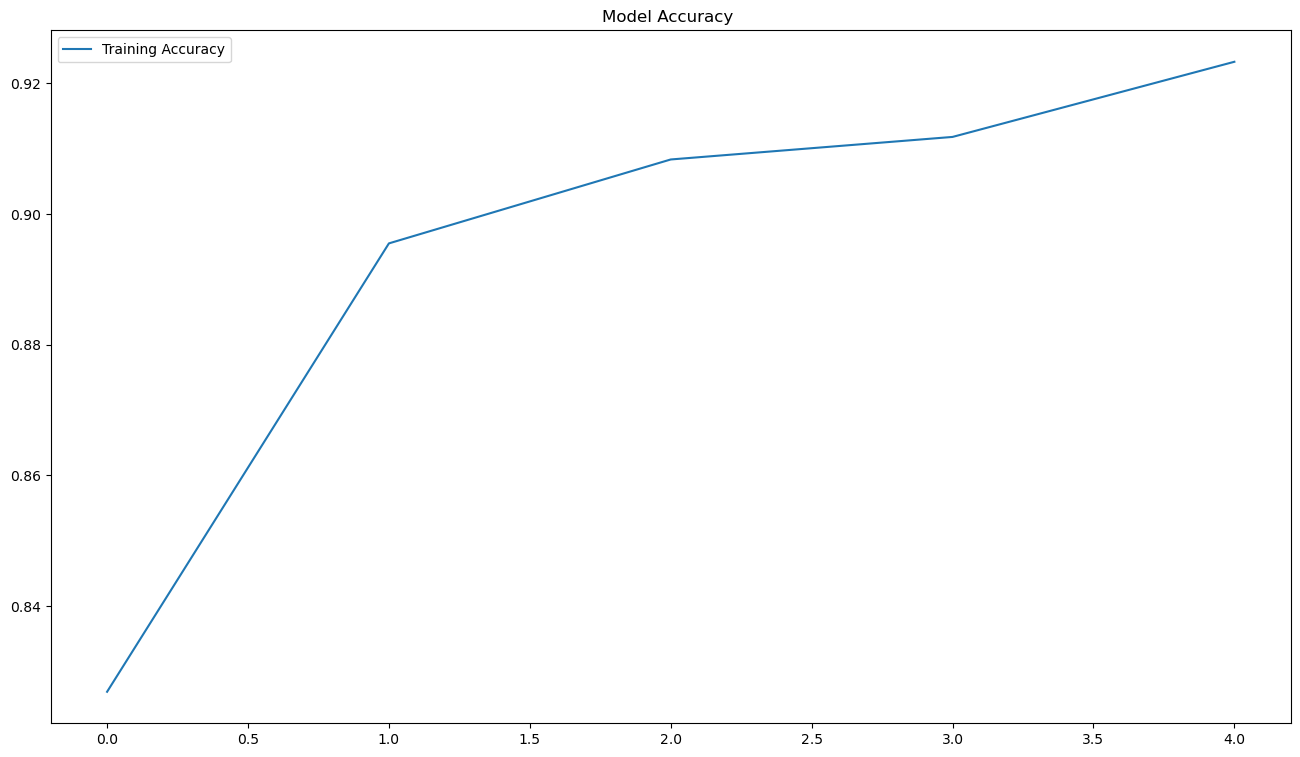

In [160]:
plt.figure(figsize=(16, 9))
plt.plot(history.epoch, history.history['accuracy'], label='Training Accuracy')
plt.title('Model Accuracy ')
plt.legend()
plt.show()


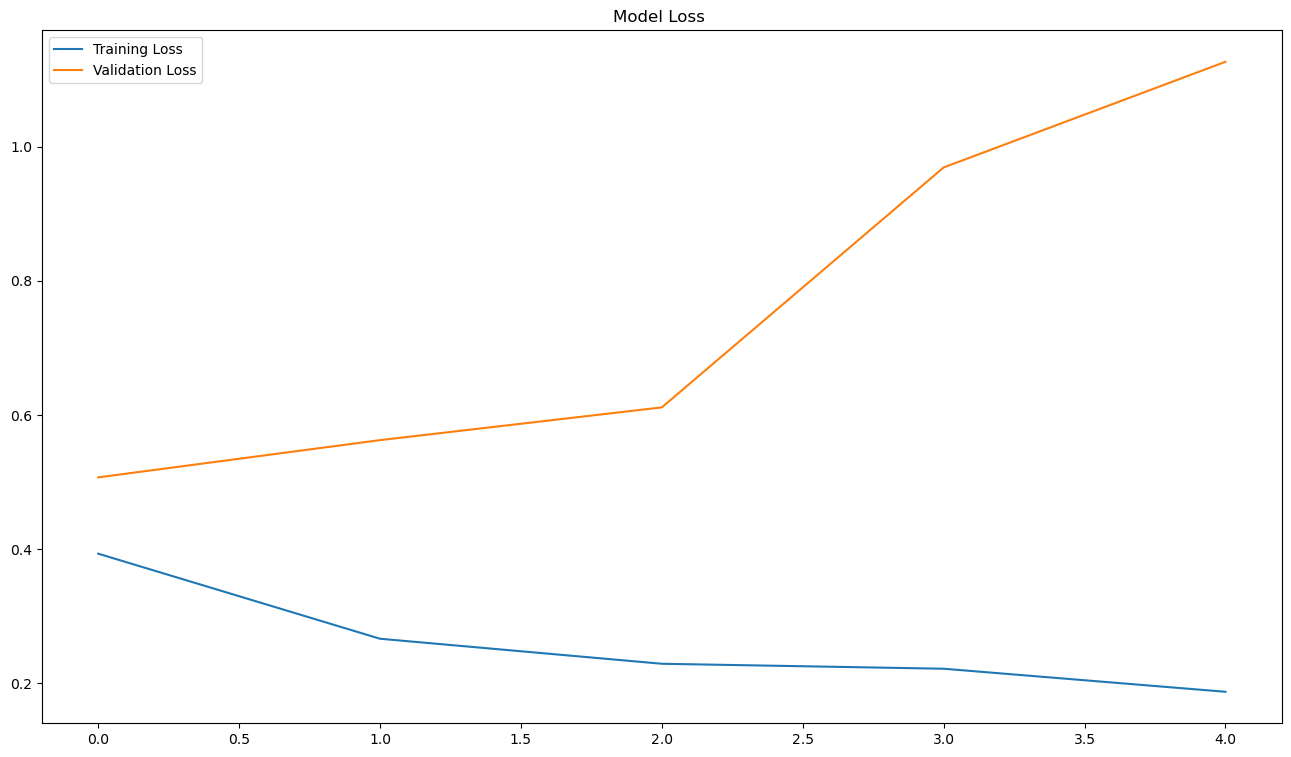

In [159]:
plt.figure(figsize=(16, 9))
plt.plot(history.epoch, history.history['loss'], label='Training Loss')
plt.plot(history.epoch, history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss ')
plt.legend()
plt.show()


In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Validation Accuracy')
plt.xlabel('Validation Steps')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Validation Loss')
plt.xlabel('Validation Steps')
plt.ylabel('Loss')
plt.legend()
plt.show()


NameError: name 'X_train' is not defined

1/1 [==============================] - 0s 262ms/step


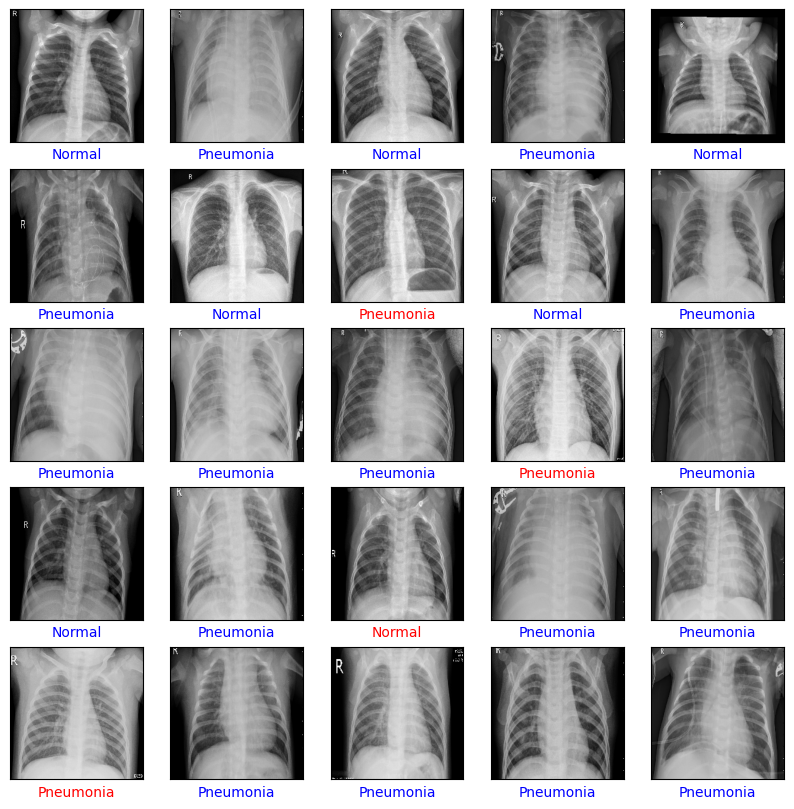

In [156]:
# Visualize Predictions on a Subset of Test Data
num_samples_to_visualize = 25

# Generate predictions on the test set
X_test, y_test = test_generator.next()
predictions = model.predict(X_test)
binary_predictions = np.round(predictions).astype(int)

# Map class labels to human-readable names
labels = {0: 'Normal', 1: 'Pneumonia'}

# Display a grid of images with predictions
plt.figure(figsize=(10, 10))
for i in range(num_samples_to_visualize):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i])
    
    pred_label = binary_predictions[i][0]  # Convert array to scalar
    
    if pred_label == y_test[i]:
        plt.xlabel(labels[pred_label], color='blue')
    else:
        plt.xlabel(labels[pred_label], color='red')
plt.show()


1/1 [==============================] - 0s 178ms/step


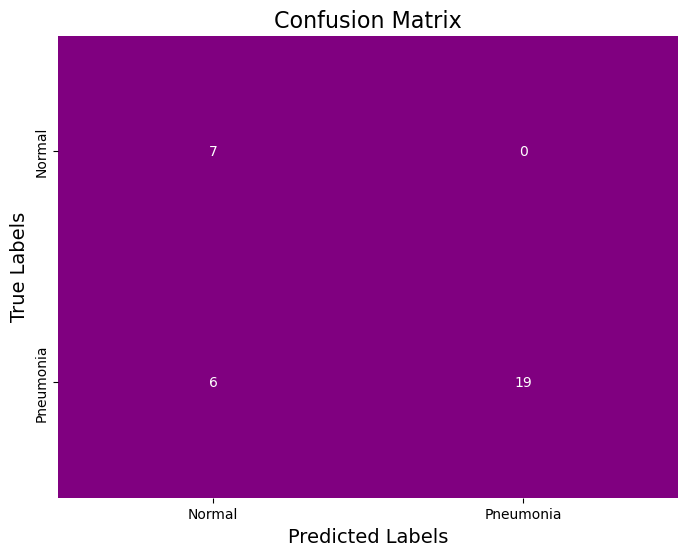

In [158]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Generate predictions on the test set
X_test, y_test = test_generator.next()
predictions = model.predict(X_test)
binary_predictions = np.round(predictions).astype(int)

# Create Confusion Matrix
matrix = confusion_matrix(binary_predictions, y_test)

# Define a single color for both classes
color = "purple"

# Create a custom colormap with a single color
cmap = mcolors.ListedColormap([color])

# Plot Confusion Matrix as a Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='g', cmap=cmap, cbar=False,
            xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'],
            annot_kws={"color": "white"})

# Labels, Title
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('True Labels', size=14)
plt.title('Confusion Matrix', size=16) 

plt.show()

